In [40]:
# Allow rendering of Matplotlib plots directly on Jupyter Notebooks.
%matplotlib inline

# Import all dependencies required for the problem.
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
# Set a Seed for random number generation for reproducible results
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [7]:
# Load the Game Reviews dataset using Pandas library 
df = pd.read_csv('../data/game_reviews.csv')

In [8]:
df.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [35]:
filtered_platforms = df[(df['platform'] == 'Xbox') | (df['platform'] == 'PlayStation 4')]
filtered_platforms.pivot_table(index=['platform', 'genre'], values=['score'], aggfunc=np.mean)

score
platform      genre                          
PlayStation 4 Action                 7.550000
              Action, Adventure      7.835294
              Action, Compilation    8.700000
              Action, Platformer     5.600000
              Action, Puzzle         6.000000
              Action, RPG            8.816667
              Adventure              7.388571
              Adventure, Adventure   6.800000
              Adventure, RPG         7.700000
              Board                  6.000000
              Fighting               7.280000
              Flight, Action         7.200000
              Music                  8.066667
              Music, Action          7.000000
              Pinball                9.000000
              Platformer             8.390909
              Platformer, Action     9.100000
              Platformer, Adventure  9.000000
              Puzzle                 7.400000
              Puzzle, Action         8.166667
              Puzzle, Adventure      7.700000
              RPG                    7.944000
              Racing                 7.590000
              Racing, Action         6.533333
              Shooter                7.804444
              Simulation             9.250000
              Sports                 7.430000
              Sports, Baseball       8.100000
              Strategy               6.566667
              Strategy, RPG          8.700000
...                                       ...
Xbox          Compilation            6.800000
              Fighting               7.029630
              Fighting, Action       6.400000
              Fighting, Adventure    3.900000
              Fighting, Compilation  7.000000
              Flight                 8.000000
              Flight, Action         7.716667
              Flight, Racing         7.000000
              Hunting                5.900000
              Music                  7.666667
              Party                  5.200000
              Pinball                6.100000
              Platformer             7.303448
              Puzzle                 5.125000
              Puzzle, Action         5.200000
              RPG                    8.277778
              Racing                 7.021591
              Racing, Action         6.457895
              Racing, Compilation    8.200000
              Racing, Simulation     8.666667
              Shooter                7.485417
              Simulation             7.155556
              Sports                 7.884397
              Sports, Action         7.732000
              Sports, Simulation     8.300000
              Strategy               7.313333
              Strategy, RPG          7.550000
              Trivia                 7.066667
              Wrestling              7.212500
              Wrestling, Simulation  7.000000

[72 rows x 1 columns]

In [80]:
platform_count = df[['title', 'platform']].groupby(['platform']).count()
platform_count.head()

,title
platform,
Android,39
Arcade,11
Atari 2600,5
Atari 5200,2
Commodore 64/128,6


In [81]:
sorted_platform_count = platform_count.sort_values('title', ascending=False).head(10)
sorted_platform_count

,title
platform,
PC,3370
PlayStation 2,1686
Xbox 360,1631
Wii,1366
PlayStation 3,1356
Nintendo DS,1045
PlayStation,952
Wireless,910
iPhone,842


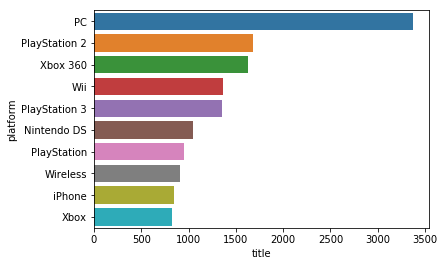

In [82]:
sns.barplot(y=sorted_platform_count.index, x=sorted_platform_count['title'])

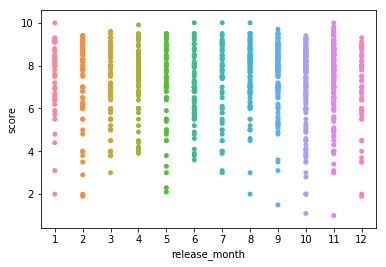

In [101]:
sns.stripplot(x=filtered_platforms.release_month, y=filtered_platforms.score, size=5)